In [2]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz

In [3]:
wine = load_wine()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [4]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度accuracy

In [27]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf, out_file="./Tree.dot"
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                               )

In [30]:
graph = graphviz.Source(dot_data)
# graph

In [39]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="best"
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9074074074074074

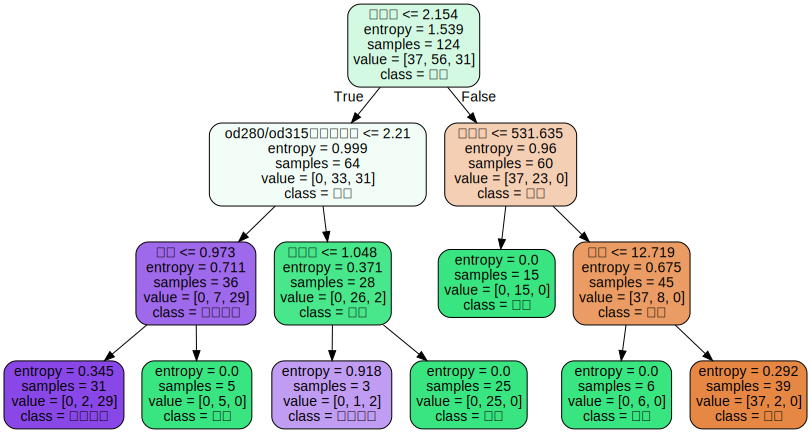

In [40]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                #    ,min_samples_leaf=10
                                #    ,min_samples_split=25
                                    )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [41]:
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

In [73]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                #    ,min_samples_leaf=5
                                #    ,min_samples_split=10
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

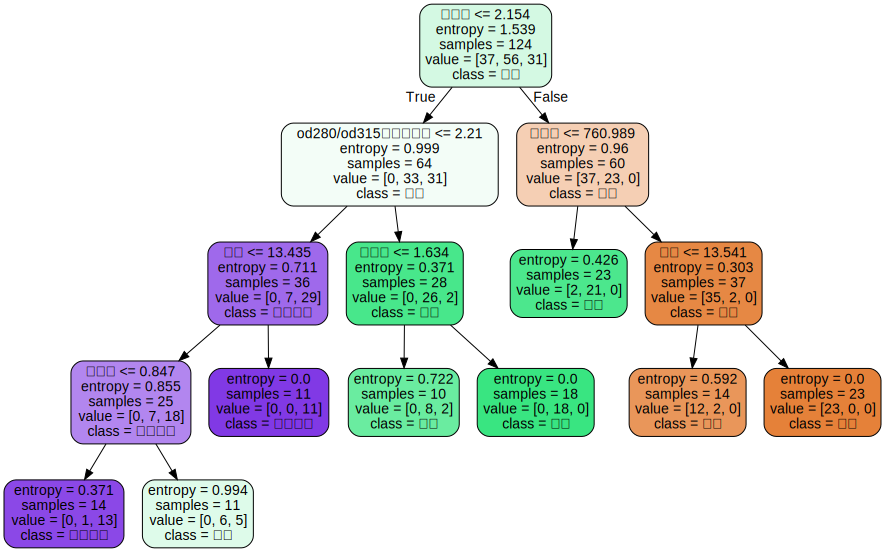

In [58]:
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [74]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [76]:
boston = load_boston()

In [84]:
regressor = DecisionTreeRegressor(random_state=42)
score = cross_val_score(regressor, boston.data, boston.target, cv=10
,scoring = "neg_mean_squared_error").mean()
score

-35.50968274509803

In [80]:
regressor = DecisionTreeRegressor(random_state=0) #实例化
cross_val_score(regressor, boston.data, boston.target, cv=10).mean()

-0.029789843576721542

In [85]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [96]:
rng = np.random.RandomState(42) #随机数种子
X = np.sort(5 * rng.rand(80,1), axis=0) #生成0~5之间随机的x的取值
# X = 5 * rng.rand(80, 1)
y = np.sin(X).ravel() #生成正弦曲线
y[::5] += 3 * (0.5 - rng.rand(16)) #在正弦曲线上加噪声

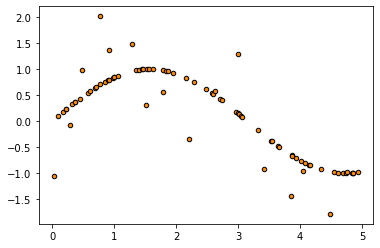

In [97]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

In [117]:
l = np.array([1, 2, 3, 4])
print(l.shape)
l[:, np.newaxis].shape
l[np.newaxis, :]

(4,)


array([[1, 2, 3, 4]])

In [118]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [119]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
y_1 = regr_1.fit(X, y).predict(X_test)
y_2 = regr_2.fit(X, y).predict(X_test)

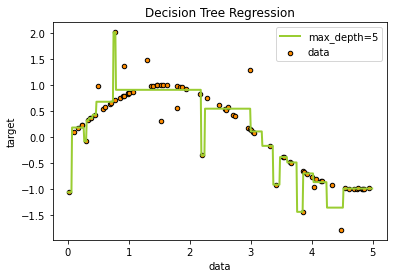

In [122]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
# plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [189]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [190]:
data = pd.read_csv('data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
# 删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True, axis=1)

In [192]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.dropna()

In [193]:
#将分类变量转换为数值型变量

#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data['Sex'] = (data['Sex'] == 'male').astype('int')

In [194]:

#将三分类变量转换为数值型变量
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))
data['Embarked'].unique()

array([0, 1, 2])

In [141]:
test = list(['x', 'y', 'z'])
test.index('x')

0

In [195]:
display(data.iloc[:5,:])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [196]:
X = data.iloc[:, data.columns != 'Survived']
y = data.iloc[:, data.columns == 'Survived']

In [197]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=42)


In [198]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
Xtrain.index

RangeIndex(start=0, stop=622, step=1)

In [199]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,35.0,1,0,90.0000,0
1,3,0,24.0,0,0,8.8500,0
2,3,1,21.0,0,0,7.9250,0
3,2,1,36.0,1,2,27.7500,0
4,2,1,29.0,1,0,27.7208,1


In [200]:
clf = DecisionTreeClassifier(random_state=42).fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.7602996254681648

In [202]:
score = cross_val_score(clf, X, y, cv=5).mean()
score

0.7705706849488987

0.8189043356820923


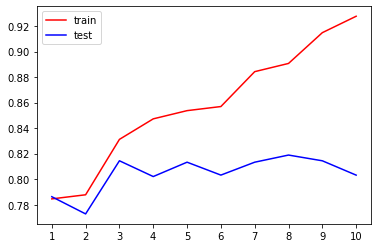

In [203]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [219]:
import numpy as np
gini_thresholds = np.linspace(0, 0.3, 20)
parameters = {
            # 'splitter':('best','random')
            #   ,'criterion':("gini","entropy")
            #   ,"max_depth":[*range(1,50)]
            #   'min_samples_leaf':[*range(1,50,10)]
            #   'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }
clf = DecisionTreeClassifier(
    random_state=42
    ,max_depth=11
    ,splitter='random'
    ,criterion='gini')
GS = GridSearchCV(clf, parameters, cv=5)
GS.fit(Xtrain, Ytrain)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=11, random_state=42,
                                              splitter='random'),
             param_grid={'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
                                           

In [220]:
GS.best_score_

0.8311870967741936

In [221]:
GS.best_params_

{'min_impurity_decrease': 0.0}

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier 

In [238]:
# 生成二分型数据
X, y = make_classification(n_samples=100
                            ,n_features=2
                            ,n_redundant=0
                            ,n_informative=2
                            ,random_state=42
                            ,n_clusters_per_class=1)
# rng = np.random.RandomState(42)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)
# plt.scatter(X[:,0],X[:,1])

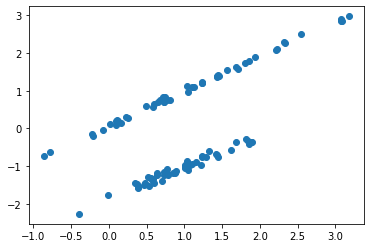

In [239]:
plt.scatter(X[:,0], X[:, 1])

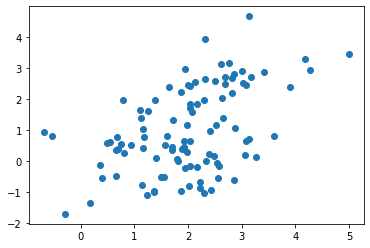

In [240]:
#从图上可以看出,生成的二分型数据的两个簇离彼此很远,这样不利于我们测试分类器的效果,因此我们使用np生成随机数组,通过让已经生成的二分型数据点加减0~1之间的随机数,使数据分布变得更散更稀疏
#注意,这个过程只能够运行一次,因为多次运行之后X会变得非常稀疏,两个簇的数据会混合在一起,分类器的效应会继续下降
rng = np.random.RandomState(42)
X += 2 * rng.uniform(size=X.shape)
plt.scatter(X[:,0],X[:,1])

In [241]:
linearly_separable = (X, y)
#生成数据集
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]


In [242]:
#创建画布,宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1

<Figure size 432x648 with 0 Axes>

In [243]:
#开始迭代数据,对datasets中的数据进行for循环
# for ds_index, ds in enumerate(datasets):
    #对X中的数据进行标准化处理,然后分训练集和测试集
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
#找出数据集中两个特征的最大值和最小值，创造一个比两个特征的区间本身更大一点的区间
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [244]:
#用特征向量生成网格数据,网格数据,其实就相当于坐标轴上无数个点
#函数np.arange在给定的两个数之间返回均匀间隔的值,0.2为步长
#函数meshgrid用以生成网格数据,能够将两个一维数组生成两个二维矩阵。
#如果第一个数组是narray,维度是n,第二个参数是marray,维度是m。那么生成的第一个二维数组是以narray为行,m行的矩阵,而第二个二维数组是以marray的转置为列,n列的矩阵
#生成的网格数据,是用来绘制决策边界的,因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
np.arange(x2_min, x2_max, 0.2))

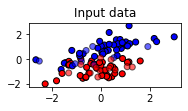

In [254]:
#接下来生成彩色画布
#用ListedColormap为画布创建颜色,#FF0000正红,#0000FF正蓝
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#在画布上加上一个子图,数据为len(datasets)行,2列,放在位置i上
ax = plt.subplot(3, 2, 1)
#到这里为止,已经生成了0~1之间的坐标系3个了,接下来为我们的坐标系放上标题
#我们有三个坐标系,但我们只需要在第一个坐标系上有标题,因此设定if ds_index==0这个条件
ax.set_title("Input data")
#将数据集的分布放到我们的坐标系上
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            cmap=cm_bright,edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
            cmap=cm_bright, alpha=0.6,edgecolors='k')


In [250]:
#为图设置坐标轴的最大值和最小值，并设定没有坐标轴
ax.set_xlim(array1.min(), array1.max())
ax.set_ylim(array2.min(), array2.max())
ax.set_xticks(())
ax.set_yticks(())

[]

[]

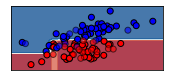

In [255]:
#迭代决策树
ax = plt.subplot(len(datasets),2,2)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
#将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
Z = Z.reshape(array1.shape)
ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)

#将数据集的分布放到我们的坐标系上
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
            edgecolors='k', alpha=0.6)
#为图设置坐标轴的最大值和最小值
ax.set_xlim(array1.min(), array1.max())
ax.set_ylim(array2.min(), array2.max())

#设定坐标轴不显示标尺也不显示数字
ax.set_xticks(())
ax.set_yticks(())